# Data Cleaning with Python

It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead us to draw inaccurate conclusions. Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. Here I will work to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. I will deal with improper data types, check that the data is in the correct range, handle missing data, perform record linkage, and more!


###### Common Data Problems

Here I'll learn how to overcome some of the most common dirty data problems. I'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.


###### Common data types

Manipulating and analyzing data with incorrect data types could lead to compromised analysis as you go along the data science workflow. 

When working with new data, you should always check the data types of your columns using the .dtypes attribute or the .info() method which I'll work on next. Often times, I'll run into columns that should be converted to different data types before starting any analysis.

Correctly identifying what type your data is is one of the easiest ways to avoid hampering your analysis due to data type constraints in the long run.


###### Numeric data or ... ?

I'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service. 

The user_type column contains information on whether a user is taking a free ride and takes on the following values:
    
1 - for free riders.

2 - for pay per ride.

3 - for monthly subscribers.

I will print the information of ride_sharingusing .info() and see a firsthand example of how an incorrect data type can flaw the analysis of the dataset. The pandaspackage is imported as pd.


In [1]:
import pandas as pd 

In [4]:
ride_sharing = pd.read_csv('ride_sharing_new.csv', index_col=0)

In [7]:
# Printing the information of ride_sharing
print(ride_sharing.info())

# Printing summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
duration           25760 non-null object
station_A_id       25760 non-null int64
station_A_name     25760 non-null object
station_B_id       25760 non-null int64
station_B_name     25760 non-null object
bike_id            25760 non-null int64
user_type          25760 non-null int64
user_birth_year    25760 non-null int64
user_gender        25760 non-null object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [6]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


###### Question

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

Answer: 
    
The user_type column has a finite set of possible values that represent groupings of data, it should be converted to category.

Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.

Make sure you converted user_type_cat correctly by using an assert statement.

In [8]:
# Printing the information of ride_sharing
print(ride_sharing.info())

# Printing summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Converting user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Writing an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Printing new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
duration           25760 non-null object
station_A_id       25760 non-null int64
station_A_name     25760 non-null object
station_B_id       25760 non-null int64
station_B_name     25760 non-null object
bike_id            25760 non-null int64
user_type          25760 non-null int64
user_birth_year    25760 non-null int64
user_gender        25760 non-null object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [9]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 10 columns):
duration           25760 non-null object
station_A_id       25760 non-null int64
station_A_name     25760 non-null object
station_B_id       25760 non-null int64
station_B_name     25760 non-null object
bike_id            25760 non-null int64
user_type          25760 non-null int64
user_birth_year    25760 non-null int64
user_gender        25760 non-null object
user_type_cat      25760 non-null category
dtypes: category(1), int64(5), object(4)
memory usage: 2.0+ MB


In [ ]:
Taking a look at the new summary statistics, it seems that most users are pay per ride users!

In [10]:
# Stripping duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes') 

# Converting duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Writing an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Printing formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


11 minutes is really not bad for an average ride duration in a city like San-Francisco. Next I am going to jump right ahead into sanity checking the range of values in the data.


In [11]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11


###### Tire size constraints

Here I am going to build on top of the work you've been doing with the ride_sharing DataFrame. I'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

I will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

In [ ]:
# Convert tire_sizes to integer
#ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
#ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
#ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
#print(ride_sharing['tire_sizes'].describe())

Now I will work on another arilines dataset and deal with text and categorical data problems

In [49]:
import datetime as dt
today_date = dt.date.today()

In [50]:
today_date

datetime.date(2020, 7, 5)

In [17]:
airlines = pd.read_csv('airlines_final.csv')
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


###### Text and categorical data problems

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. Here I will work to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.


In [51]:
categories = pd.read_csv('survey.csv')
categories

,cleanliness,safety,satisfaction
0,Clean,neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat cirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [18]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0          Clean           neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat cirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [19]:
# Finding the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Finding rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Printing rows with inconsistent category
print(airlines[cat_clean_rows])

      Unnamed: 0    id       day        airline        destination  \
0              0  1351   Tuesday    UNITED INTL             KANSAI   
1              1   373    Friday         ALASKA  SAN JOSE DEL CABO   
3              3  1157   Tuesday      SOUTHWEST        LOS ANGELES   
6              6  2578  Saturday        JETBLUE         LONG BEACH   
10            11  1129   Tuesday      SOUTHWEST          SAN DIEGO   
...          ...   ...       ...            ...                ...   
2470        2802   394    Friday         ALASKA        LOS ANGELES   
2473        2805  2222  Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684    Friday         UNITED            ORLANDO   
2475        2807  2549   Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162  Saturday  CHINA EASTERN            QINGDAO   

        dest_region dest_size boarding_area   dept_time  wait_min cleanliness  \
0              Asia       Hub  Gates 91-102  2018-12-31     115.0       Clean 

In [20]:
# Finding the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Finding rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Printing rows with inconsistent category
print(airlines[cat_clean_rows])

# Printing rows with consistent categories only
print(airlines[~cat_clean_rows])

      Unnamed: 0    id       day        airline        destination  \
0              0  1351   Tuesday    UNITED INTL             KANSAI   
1              1   373    Friday         ALASKA  SAN JOSE DEL CABO   
3              3  1157   Tuesday      SOUTHWEST        LOS ANGELES   
6              6  2578  Saturday        JETBLUE         LONG BEACH   
10            11  1129   Tuesday      SOUTHWEST          SAN DIEGO   
...          ...   ...       ...            ...                ...   
2470        2802   394    Friday         ALASKA        LOS ANGELES   
2473        2805  2222  Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684    Friday         UNITED            ORLANDO   
2475        2807  2549   Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162  Saturday  CHINA EASTERN            QINGDAO   

        dest_region dest_size boarding_area   dept_time  wait_min cleanliness  \
0              Asia       Hub  Gates 91-102  2018-12-31     115.0       Clean 

###### Inconsistent categories

I wil be revisiting the airlines DataFrame from above.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

I will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in the environment.


In [21]:
# Printing the unique values in dest_region and dest_size respectively.
# Printing unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())



['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [23]:
# Changing the capitalization of all values of dest_region to lowercase.
# Replacing the 'eur' with 'europe' in dest_region using the .replace() method.
# Printing unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lowering dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})


['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


Stripping white spaces from the dest_size column using the .strip() method.

Verifying that the changes have been into effect by printing the unique values of the columns using .unique() .


In [ ]:
# Printing unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lowering dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Removing white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verifying changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())


###### Remapping categories

To better understand survey respondents from airlines, I want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make the analysis easier, I will create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
    
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.


In [25]:
# Creating ranges for categories
import numpy as np
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Creating wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Creating mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)


In [26]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


###### Advanced data problems

I will dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. This analysis will help us to verify that values have been added correctly and that missing values don’t negatively impact the analyses.

###### Ambiguous dates

I have a DataFrame containing a subscription_date column that was collected from various sources with different Date formats such as YYYY-mm-dd and YYYY-dd-mm. What is the best way to unify the formats for ambiguous values such as 2019-04-07?

• Set them to NA and drop them.

• Infer the format of the data in question by checking the format of subsequent and previous values.

• Infer the format from the original data source.

• All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.

Like most cleaning data tasks, ambiguous dates require a thorough understanding of where the data comes from. Diagnosing problems is the first step in finding the best solution!


###### Uniform currencies

I will now be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts, their currency, amount invested, account opening date and last transaction date that were consolidated from American and European branches.

Here I will be working with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, we first need to unify the currency amount into dollars. 


In [27]:
banking = pd.read_csv('banking_dirty.csv')

In [28]:
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [38]:
banking.dtypes

Unnamed: 0                   int64
cust_id                     object
birth_date                  object
Age                          int64
acct_amount                float64
inv_amount                   int64
fund_A                     float64
fund_B                     float64
fund_C                     float64
fund_D                     float64
account_opened      datetime64[ns]
last_transaction            object
acct_year                   object
dtype: object

In [ ]:
###### Uniform dates

After having unified the currencies of different account amounts, I want to add a temporal dimension to the analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, I need to make sure that all dates are of the same format. I will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. 

• Printing the header of account_opened from the banking DataFrame and taking a look at the different results.


In [30]:
# Print the header of account_opened
print(banking['account_opened'].head())


0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


###### Question

Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:
    
ValueError: month must be in 1..12
    
Why do you think that is?

Possible Answers

The to_datetime() function needs to be explicitly told which date format each row is in.

The to_datetime() function can only be applied on YY-mm-dd date formats. (correct)

The 21-14-17 entry is erroneous and leads to an error.


• Converting the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.


In [31]:
# Printing the header of account_opened
print(banking['account_opened'].head())

# Converting account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Inferring datetime format
                                           infer_datetime_format = True,
                                           # Returning missing value for error
                                           errors = 'coerce')


0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


• Extracting the year from the amended account_opened column and assign it to the acct_year column.

• Printing the newly created acct_year column.


In [32]:
# Printing the header of account_opend
print(banking['account_opened'].head())

# Converting account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')  

# Getting year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Printing acct_year
print(banking['acct_year'])


0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


###### How's our data integrity?

New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

I want to understand how customers of different age groups invest. I want to first make sure the data I am analyzing is correct. I will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. 



In [33]:
# Storing fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Finding rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Storing consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Storing consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


Storing today's date into today, and manually calculate customers' ages and storing them in ages_manual.

Finding all rows of banking where the age column is equal to ages_manual and then filtering banking into consistent_ages and inconsistent_ages.


In [39]:
# Converting birth_date to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')


In [41]:
# Storing today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Finding rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Storing consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Storing consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


Awesome work! There are only 8 and 8 rows affected by inconsistent inv_amount and age values respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!


###### Is this missing at random?

There are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

• Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
    
• Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
    
• Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.
    
You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?

A customer satisfaction_score column with missing values for highly dissatisfied customers.

Missing completely at random

There's obviously an underlying mechanism behind the missingness of the data.

Missing at Random

This would be more applicable if missing satisfaction_score values were due to values in another column of the DataFrame.

Missing not at random

Awesome work! This is a clear example of missing not at random, where low values of satisfaction_score are missing because of inherently low satisfaction!


In [45]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


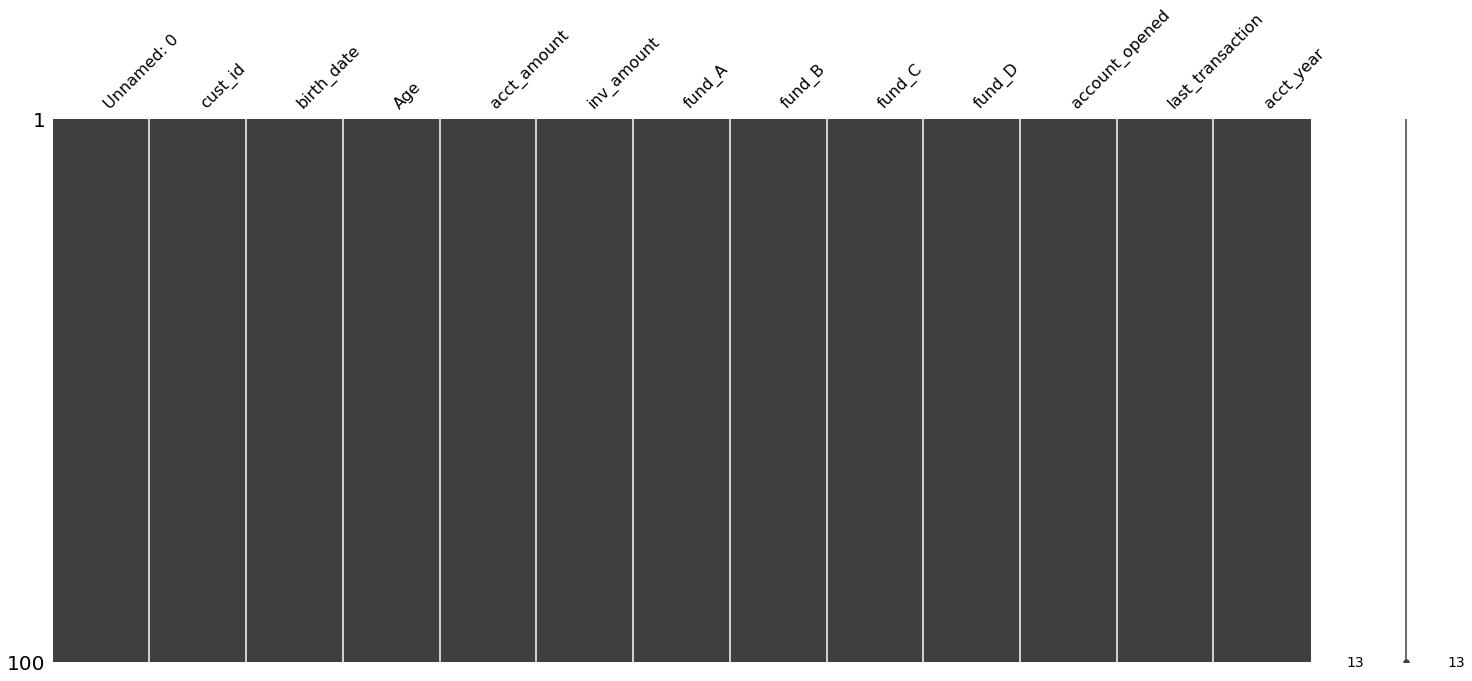

In [46]:
importing matplotlib.pyplot as plt 
import missingno as msno
# Print number of missing values in banking
print(banking.isna().sum())

# Visualizing missingness matrix
msno.matrix(banking)
plt.show()

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


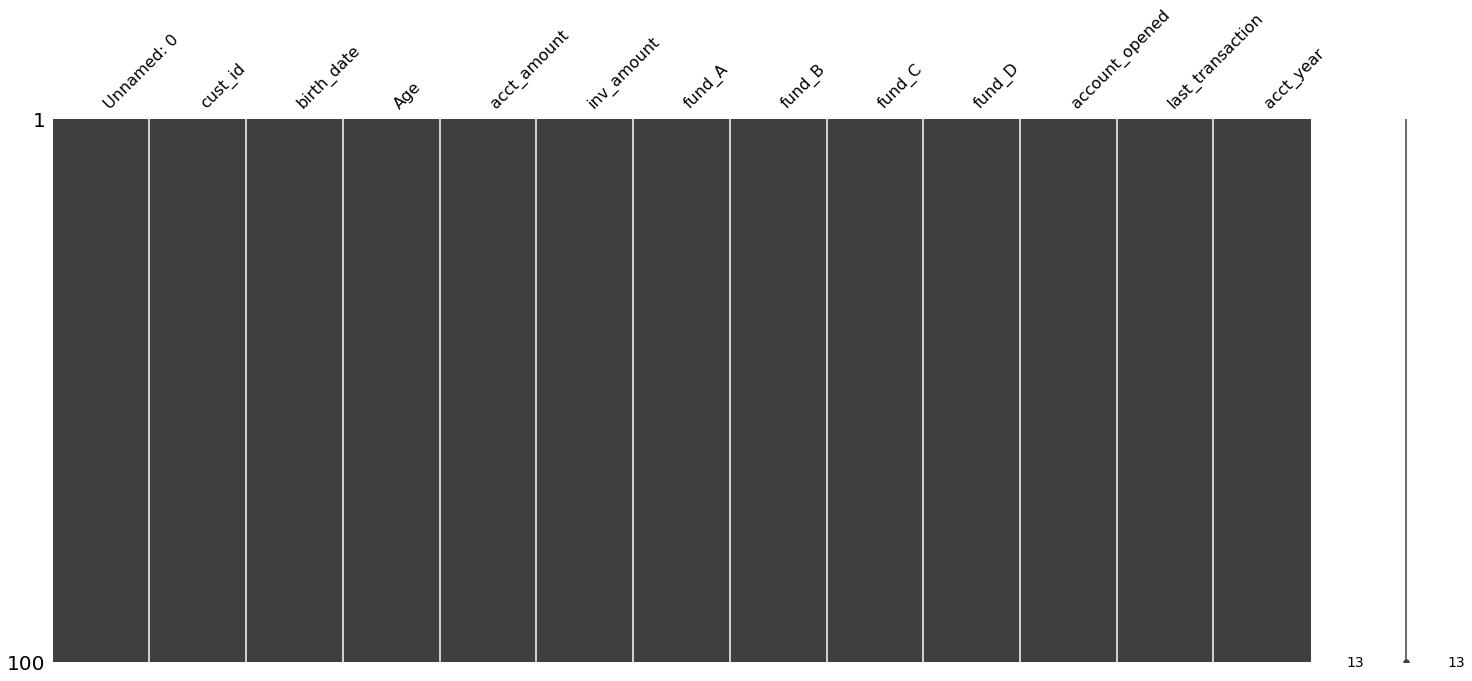

In [47]:
# Isolating the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.

# Printing number of missing values in banking
print(banking.isna().sum())

# Visualizing missingness matrix
msno.matrix(banking)
plt.show()

# Isolating missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]


That's all for now. I have used many other techniques for data cleaning in my other projects available on my Github page. 

Thanks a lot for your attention. 